In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from util.combine_stream import get_arff_data_labels, plot_anomaly
import os

In [6]:
params_file = "data/synthetic/params_used.csv"
old_params_df = pd.read_csv(params_file, index_col=0)

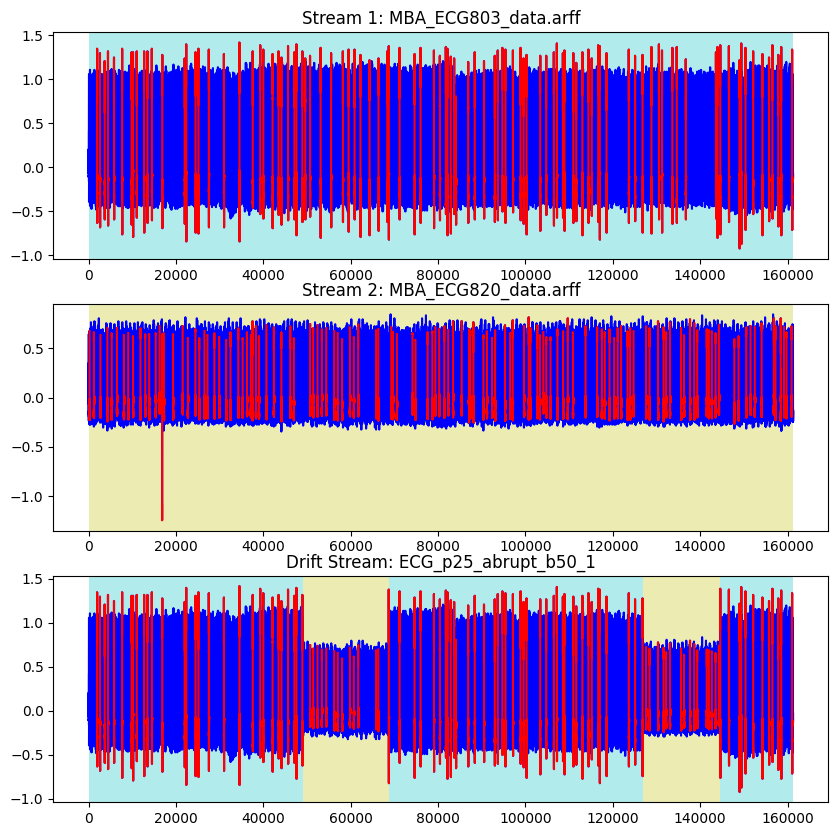

In [9]:
i = 1 # 0 - 5
IOPS_dir = 'data/benchmark/ECG'
drift_dir = 'data/synthetic/p_drift'
X1, y1 = get_arff_data_labels(f'{IOPS_dir}/{old_params_df.stream1.loc[i]}')
X2, y2 = get_arff_data_labels(f'{IOPS_dir}/{old_params_df.stream2.loc[i]}')
X3, y3 = get_arff_data_labels(f'{drift_dir}/{old_params_df.filename.loc[i]}.arff')
end = old_params_df.length.loc[i]
split_index = old_params_df.split_index.loc[i]
split_index = split_index.strip('[]').split(', ')
split_index = [int(s_i) for s_i in split_index]

fig, ax = plt.subplots(3,1,figsize=(10,10))
plot_anomaly(X1, y1, ax[0], 0, end, title=f'Stream 1: {old_params_df.stream1.loc[i]}')
ax[0].axvspan(0, end, facecolor='c', alpha=0.3)
plot_anomaly(X2, y2, ax[1], 0, end, title=f'Stream 2: {old_params_df.stream2.loc[i]}')
ax[1].axvspan(0, end, facecolor='y', alpha=0.3)
plot_anomaly(X3, y3, ax[2], title=f'Drift Stream: {old_params_df.filename.loc[i]}')
ax[2].axvspan(0, split_index[0], facecolor='c', alpha=0.3)
colour = 'y'
for k in range(1, len(split_index)):
    ax[2].axvspan(split_index[k-1], split_index[k], facecolor=colour, alpha=0.3)
    if colour == 'c': colour = 'y'
    else: colour = 'c'
ax[2].axvspan(split_index[-1], end, facecolor=colour, alpha=0.3)

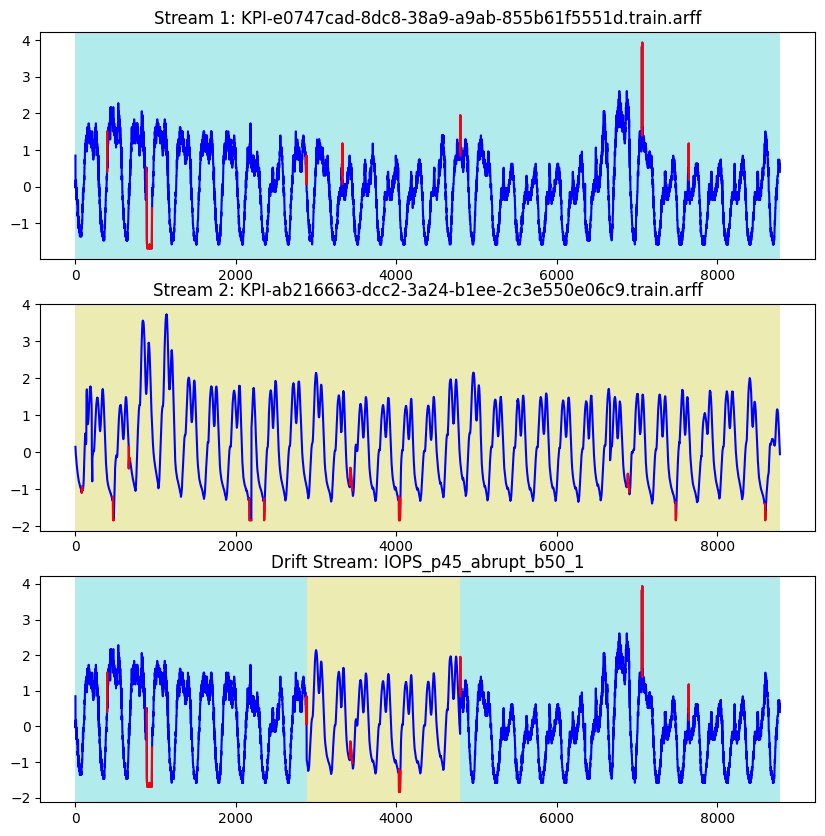

In [10]:
i = 10 # 6 - 10
IOPS_dir = 'data/benchmark/IOPS'
drift_dir = 'data/synthetic/p_drift'
X1, y1 = get_arff_data_labels(f'{IOPS_dir}/{old_params_df.stream1.loc[i]}')
X2, y2 = get_arff_data_labels(f'{IOPS_dir}/{old_params_df.stream2.loc[i]}')
X3, y3 = get_arff_data_labels(f'{drift_dir}/{old_params_df.filename.loc[i]}.arff')
end = old_params_df.length.loc[i]
split_index = old_params_df.split_index.loc[i]
split_index = split_index.strip('[]').split(', ')
split_index = [int(s_i) for s_i in split_index]

fig, ax = plt.subplots(3,1,figsize=(10,10))
plot_anomaly(X1, y1, ax[0], 0, end, title=f'Stream 1: {old_params_df.stream1.loc[i]}')
ax[0].axvspan(0, end, facecolor='c', alpha=0.3)
plot_anomaly(X2, y2, ax[1], 0, end, title=f'Stream 2: {old_params_df.stream2.loc[i]}')
ax[1].axvspan(0, end, facecolor='y', alpha=0.3)
plot_anomaly(X3, y3, ax[2], title=f'Drift Stream: {old_params_df.filename.loc[i]}')
ax[2].axvspan(0, split_index[0], facecolor='c', alpha=0.3)
colour = 'y'
for k in range(1, len(split_index)):
    ax[2].axvspan(split_index[k-1], split_index[k], facecolor=colour, alpha=0.3)
    if colour == 'c': colour = 'y'
    else: colour = 'c'
ax[2].axvspan(split_index[-1], end, facecolor=colour, alpha=0.3)